In [1]:
#reference:https://www.finlab.tw/Python%E6%96%B0%E6%89%8B%E6%95%99%E5%AD%B84%E7%9B%B8%E9%97%9C%E6%80%A7%E5%88%86%E6%9E%90/
import io
import requests
import datetime
import pandas as pd
import time

#爬取指數代號、訊息
url = "https://finance.yahoo.com/world-indices/"
response = requests.get(url)
f = io.StringIO(response.text)
dfs = pd.read_html(f)
world_index = dfs[0]

In [2]:
#print("world_index",world_index)
#print("world_index_Name",world_index['Name'])
#print("world_index_Symbol",world_index['Symbol'])

In [3]:
#爬取各指數歷史價格
def crawl_world_index(world_symbol):
   
    now = int(datetime.datetime.now().timestamp())+86400
    url = "https://query1.finance.yahoo.com/v7/finance/download/" + world_symbol + "?period1=0&period2=" + str(now) + "&interval=1d&events=history&crumb=hP2rOschxO0"

    response = requests.post(url)

    f = io.StringIO(response.text)
    df = pd.read_csv(f, index_col='Date', parse_dates=['Date'] )

    return df

In [4]:
import time
world_index_history = {}
for symbol, name in zip(world_index['Symbol'], world_index['Name']):
    
    print(name)    
    world_index_history[name] = crawl_world_index(symbol)
    time.sleep(5)

S&P 500
Dow 30
Nasdaq
NYSE COMPOSITE (DJ)
NYSE AMEX COMPOSITE INDEX
Cboe UK 100 Price Return
Russell 2000
Vix
FTSE 100
DAX PERFORMANCE-INDEX
CAC 40
ESTX 50 PR.EUR
EURONEXT 100
BEL 20
MOEX Russia Index
Nikkei 225
HANG SENG INDEX
SSE Composite Index
STI Index
S&P/ASX 200
ALL ORDINARIES
S&P BSE SENSEX
Jakarta Composite Index
FTSE Bursa Malaysia KLCI
S&P/NZX 50 INDEX GROSS
KOSPI Composite Index
TSEC weighted index
S&P/TSX Composite index
IBOVESPA
IPC MEXICO
S&P/CLX IPSA
MERVAL
TA-125
EGX 30 Price Return Index
Top 40 USD Net TRI Index


In [5]:
#畫圖看看
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.title("World_index")
for name, history in world_index_history.items():    
    history.Close.plot()

In [6]:
#使用調整收盤價
adjclose = {}
for name, price in world_index_history.items():
    if price.index.is_unique:
        adjclose[name] = price['Adj Close']
    
adjclose = pd.DataFrame(adjclose)
#adjclose

In [7]:
#相關係數矩陣找出相關性
corr = adjclose.corr()
print(corr)


                            S&P 500    Dow 30    Nasdaq  NYSE COMPOSITE (DJ)  \
S&P 500                    1.000000  0.995297  0.979962             0.984617   
Dow 30                     0.995297  1.000000  0.971390             0.978981   
Nasdaq                     0.979962  0.971390  1.000000             0.937390   
NYSE COMPOSITE (DJ)        0.984617  0.978981  0.937390             1.000000   
NYSE AMEX COMPOSITE INDEX  0.736910  0.783835  0.684491             0.885458   
Cboe UK 100 Price Return   0.905307  0.893056  0.882535             0.947540   
Russell 2000               0.971289  0.980072  0.957681             0.961312   
Vix                       -0.184565 -0.171050 -0.201120            -0.171626   
FTSE 100                   0.930482  0.918086  0.862184             0.955400   
DAX PERFORMANCE-INDEX      0.977623  0.970717  0.959829             0.966238   
CAC 40                     0.781879  0.751844  0.714585             0.814977   
ESTX 50 PR.EUR             0.738199  0.7

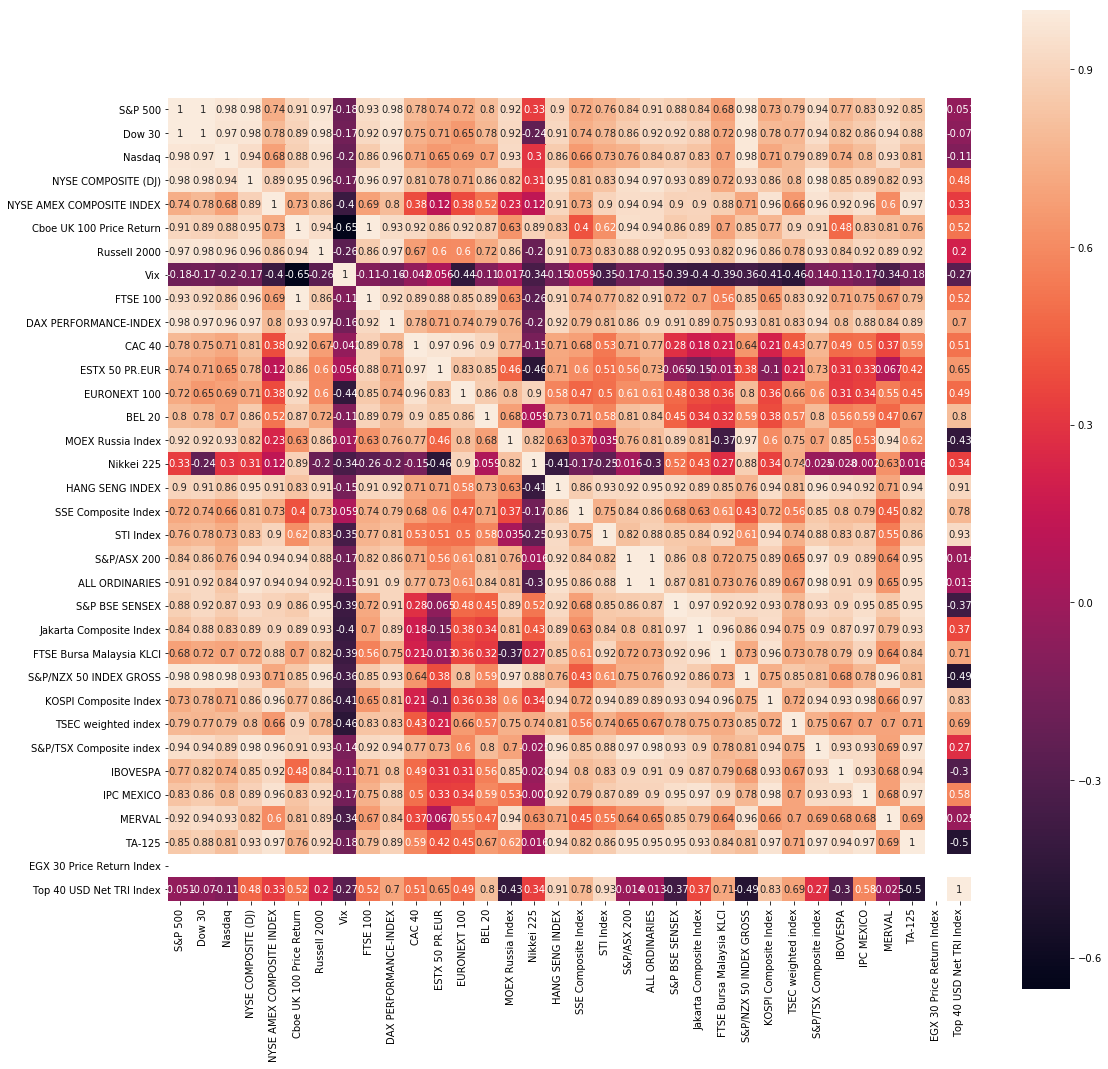

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# set figure size
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(corr, square=True ,vmax=1.0, linecolor='white', annot=True)

In [9]:
#找出相似指數
similar = pd.DataFrame(corr)
similar = similar.sort_values("TSEC weighted index",ascending=False)["TSEC weighted index"]
print(similar)

TSEC weighted index          1.000000
Cboe UK 100 Price Return     0.900082
S&P/NZX 50 INDEX GROSS       0.845167
FTSE 100                     0.828812
DAX PERFORMANCE-INDEX        0.826506
HANG SENG INDEX              0.805367
NYSE COMPOSITE (DJ)          0.795013
Nasdaq                       0.792028
S&P 500                      0.786032
S&P BSE SENSEX               0.780155
Russell 2000                 0.776294
Dow 30                       0.768968
MOEX Russia Index            0.753785
S&P/TSX Composite index      0.752394
Jakarta Composite Index      0.748324
STI Index                    0.742188
Nikkei 225                   0.739311
FTSE Bursa Malaysia KLCI     0.731823
KOSPI Composite Index        0.723118
TA-125                       0.709679
IPC MEXICO                   0.699299
MERVAL                       0.697077
Top 40 USD Net TRI Index     0.694768
IBOVESPA                     0.674717
ALL ORDINARIES               0.666761
EURONEXT 100                 0.659353
NYSE AMEX CO

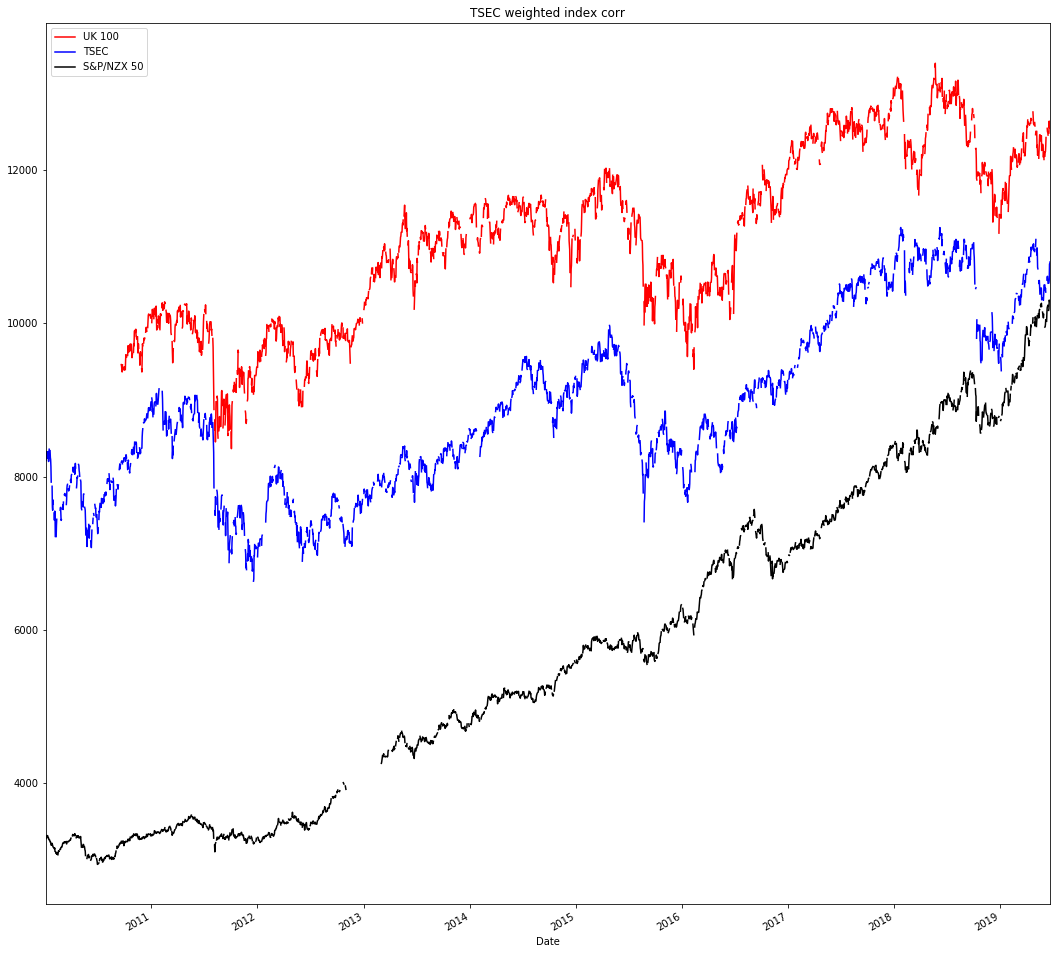

In [10]:
#發現UK 100與台灣指數最相似
plt.title("TSEC weighted index corr")

adjclose['Cboe UK 100 Price Return']['2010':].plot(color="red")
adjclose['TSEC weighted index']['2010':].plot(color="blue")
adjclose['S&P/NZX 50 INDEX GROSS']['2010':].plot(color="black")
plt.legend(['UK 100','TSEC','S&P/NZX 50'], loc="upper left")